#### 1 - Identifique e elimine preditoras correlacionadas. Mostre os coeficientes antes e depois da eliminação. Antes da eliminação não precisa utilizar todas as variáveis da base de dados.

In [94]:
def more_correlated(data, min, max):
    corr = data.corr()
    matrix = pd.DataFrame()
    dic = {}

    for column in corr:    
        for line in corr.columns:
            value = corr[column][line]

            if((value < min and value > -1) or (value > max and value < 1)):    
                dic[line] = value
        
        
        if(len(dic) > 0):
            df = pd.DataFrame({column:dic})
            matrix = pd.concat([matrix, df])
            dic.clear()
        
    return matrix

In [128]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("train.csv")
data = data.drop(["Id"], axis=1)

In [129]:
matrix = more_correlated(data, -0.7, 0.7)

<AxesSubplot:>

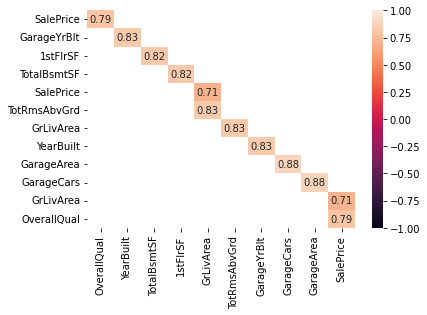

In [130]:
sns.heatmap(matrix, vmin=-1, vmax=1, annot=True)

In [132]:
#preenchedo valores ausentes e retirando valores categoricos
medians = {}

for i in data:
    if(data[i].dtype != "object"):
        if(data[i].isnull().any()):
            medians[i] = data[i].median()

data = data.fillna(value=medians)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [136]:
cat = []

for colum in data.columns:
    if data[colum].dtype == "object":
        cat.append(colum)

x = data.drop(cat, axis=1)
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [137]:
from sklearn.linear_model import LinearRegression

x = x.drop(["SalePrice"], axis=1)
sp = data["SalePrice"]

model = LinearRegression()
model.fit(x, sp) 
pd.DataFrame([model.coef_], columns=x.columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-181.707658,-54.436841,0.429697,17332.932067,4673.50063,269.173074,134.593961,31.344509,10.014123,-0.923268,...,-4.409578,23.892052,-2.891123,11.908984,20.315588,55.98664,-29.185467,-0.733568,-48.395143,-780.746618


<p>Excluindo preditoras correlacionadas

In [138]:
x = x.drop(["GarageCars", "GarageYrBlt", "1stFlrSF", "TotRmsAbvGrd"], axis=1) 

In [139]:
x["SalePrice"] = data["SalePrice"]
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [140]:
matrix_after = more_correlated(x, -0.7, 0.7)

<AxesSubplot:>

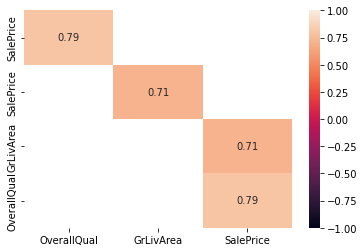

In [141]:
sns.heatmap(matrix_after, vmin=-1, vmax=1, annot=True)

In [142]:
model.fit(x, sp)
pd.DataFrame([model.coef_], columns=x.columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-2.130550e-13,-3.174128e-13,-3.194641e-16,1.430136e-11,4.169676e-12,4.420828e-13,1.504819e-13,-2.720608e-14,-7.398296e-15,1.070119e-14,...,1.203940e-14,-3.567400e-14,-6.109638e-15,7.593439e-14,-1.957371e-15,-3.237792e-14,-1.151841e-15,-3.289143e-14,-1.020490e-12,1.0


#### 2 - Encontre uma variável de confundimento e demonstre através dos coeficientes os efeitos de utilizar ou não esta variável na regressão.

In [162]:
train = data.drop(["SalePrice"], axis=1)
train = train.drop(cat, axis=1)
train

KeyError: "['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'\n 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'\n 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'\n 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'\n 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'\n 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'\n 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'\n 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'\n 'SaleCondition'] not found in axis"

In [150]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train, sp)
df = pd.DataFrame([model.coef_], columns=train.columns)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-181.707658,-54.436841,0.429697,17332.932067,4673.50063,269.173074,134.593961,31.344509,10.014123,-0.923268,...,-4.409578,23.892052,-2.891123,11.908984,20.315588,55.98664,-29.185467,-0.733568,-48.395143,-780.746618


In [151]:
#Pés quadrados do segundo andar (quando maior o segundo andar, mais cara deveria ser a casa, mas neste caso, o preço da casa está diminuindo)
df['2ndFlrSF']

0    18.187846
Name: 2ndFlrSF, dtype: float64

In [152]:
train["MSZoning"] = data["MSZoning"]
train["MSZoning"]

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [153]:
train = pd.get_dummies(train, columns=['MSZoning'] , drop_first=True)
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,2,2008,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,5,2007,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,9,2008,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,2,2006,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,12,2008,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,8,2007,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,2,2010,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,2500,5,2010,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,4,2010,0,0,1,0


In [154]:
model.fit(train, sp)
df = pd.DataFrame([model.coef_], columns=train.columns)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,-168.613931,-69.905904,0.413582,17249.67751,4623.963438,220.589851,140.263295,32.318239,10.294298,-0.964352,...,20.485142,55.21182,-28.517856,-0.782698,-29.412997,-786.428161,17455.795749,12589.795352,12749.678954,4771.099014


In [155]:
#Pés quadrados do segundo andar (agora, quando maior o segundo andar, mais cara é a casa)
df['2ndFlrSF']

0    18.76077
Name: 2ndFlrSF, dtype: float64

#### 3 - Encontre um par de variáveis que apresentam interações. Mostre os coeficientes do modelo treinado com interações.

In [156]:
for i in df:
    print(i, " -> ", df[i])

MSSubClass  ->  0   -168.613931
Name: MSSubClass, dtype: float64
LotFrontage  ->  0   -69.905904
Name: LotFrontage, dtype: float64
LotArea  ->  0    0.413582
Name: LotArea, dtype: float64
OverallQual  ->  0    17249.67751
Name: OverallQual, dtype: float64
OverallCond  ->  0    4623.963438
Name: OverallCond, dtype: float64
YearBuilt  ->  0    220.589851
Name: YearBuilt, dtype: float64
YearRemodAdd  ->  0    140.263295
Name: YearRemodAdd, dtype: float64
MasVnrArea  ->  0    32.318239
Name: MasVnrArea, dtype: float64
BsmtFinSF1  ->  0    10.294298
Name: BsmtFinSF1, dtype: float64
BsmtFinSF2  ->  0   -0.964352
Name: BsmtFinSF2, dtype: float64
BsmtUnfSF  ->  0    0.492093
Name: BsmtUnfSF, dtype: float64
TotalBsmtSF  ->  0    9.822039
Name: TotalBsmtSF, dtype: float64
1stFlrSF  ->  0    17.290297
Name: 1stFlrSF, dtype: float64
2ndFlrSF  ->  0    18.76077
Name: 2ndFlrSF, dtype: float64
LowQualFinSF  ->  0   -4.845709
Name: LowQualFinSF, dtype: float64
GrLivArea  ->  0    31.205357
Name: GrLiv

In [163]:

train.rename(columns = {'2ndFlrSF':'SecondFlrSF', '3SsnPorch':'ThirdSsnPorch', '1stFlrSF':'FirstFlrSF'}, inplace = True)
train.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [164]:
train_collumns = ""

for i in train.columns:
    train_collumns = train_collumns + " + "+ i 

train_collumns

' + MSSubClass + LotFrontage + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + Fireplaces + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThirdSsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold'

In [165]:
train["SalePrice"] = data["SalePrice"]
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [166]:
import statsmodels.formula.api as sm

inter_model = sm.ols(formula='SalePrice ~ BedroomAbvGr*GrLivArea'+train_collumns, data=train)

In [167]:
result = inter_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     191.9
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        14:44:41   Log-Likelihood:                -17326.
No. Observations:                1460   AIC:                         3.472e+04
Df Residuals:                    1427   BIC:                         3.489e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.583e+05   1.42e+06      0.535      0.593   -2.02e+06    3.54e+06
BedroomAbvGr           -2.123e+04   3308.153     -6.418      0.000   -2.77e+04   -1.47e+04
GrLivArea                 27.4134      8.248      3.324      0.001      11.234      43.593
BedroomAbvGr:GrLivArea     9.3725      1.936      4.842      0.000       5.575      13.170
MSSubClass              -198.3826     27.656     -7.173      0.000    -252.634    -144.131
LotFrontage              -52.1387     51.875     -1.005      0.315    -153.899      49.621
LotArea                    0.4348      0.102      4.245      0.000       0.234       0.636
OverallQual             1.906e+04   1188.347     16.042      0.000    1.67e+04    2.14e+04
OverallCond             3957.7457   1024.810      3.862      0.000    1947.450    5968.041
YearBuilt                312.0294     60.857      5.127      0.000     192.651     431.407
YearRemodAdd             205.3006     66.035      3.109      0.002      75.764     334.837
MasVnrArea                29.9758      5.962      5.027      0.000      18.280      41.672
BsmtFinSF1                 8.9587      2.528      3.544      0.000       4.000      13.918
BsmtFinSF2                -1.5635      4.520     -0.346      0.729     -10.430       7.303
BsmtUnfSF                  0.2073      2.419      0.086      0.932      -4.537       4.952
TotalBsmtSF                7.6024      3.364      2.260      0.024       1.003      14.201
SecondFlrSF               -3.6902      5.398     -0.684      0.494     -14.280       6.900
LowQualFinSF             -34.3276     20.473     -1.677      0.094     -74.488       5.833
BsmtFullBath            8931.8264   2626.993      3.400      0.001    3778.645    1.41e+04
BsmtHalfBath            1635.6496   4101.537      0.399      0.690   -6410.040    9681.339
FullBath                6221.5639   2829.736      2.199      0.028     670.675    1.18e+04
HalfBath                1360.9582   2702.568      0.504      0.615   -3940.475    6662.391
KitchenAbvGr           -6412.6685   5040.565     -1.272      0.204   -1.63e+04    3475.044
Fireplaces              4879.6299   1762.069      2.769      0.006    1423.106    8336.153
GarageArea                30.2363      5.836      5.181      0.000      18.788      41.685
WoodDeckSF                25.6939      8.013      3.206      0.001       9.975      41.413
OpenPorchSF               -6.7601     15.163     -0.446      0.656     -36.505      22.985
EnclosedPorch             12.1362     16.933      0.717      0.474     -21.081      45.353
ThirdSsnPorch             20.8566     31.505      0.662      0.508     -40.945      82.658
ScreenPorch               53.6709     17.239      3.113      0.002      19.854      87.488
PoolArea                 -52.0999     23.854     -2.184      0.029     -98.893  

#### 4 - Mostre os coeficientes do modelo treinado antes e depois da remoção de valores influentes.


#### 5 - Mostre se existe ou não heterocedasticidade no seu modelo de regressão linear multivariado.

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(result)

c:\Users\yrese\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'abs(residual)')

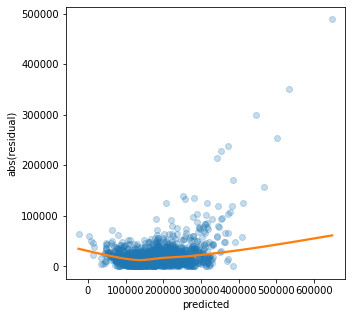

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(result.fittedvalues, np.abs(result.resid), scatter_kws={'alpha':0.25}, line_kws={'color':'C1'}, lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

#### 6 - Interprete os gráficos residuais parciais no seu modelo de regressão linear multiváriado 

c:\Users\yrese\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


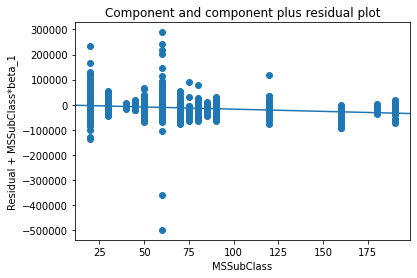

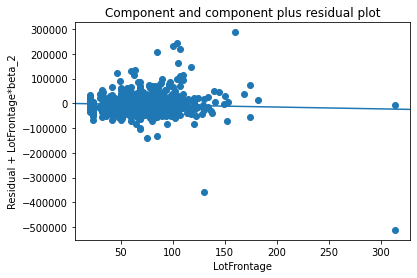

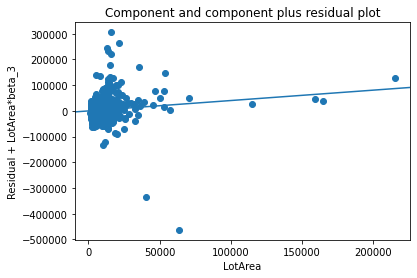

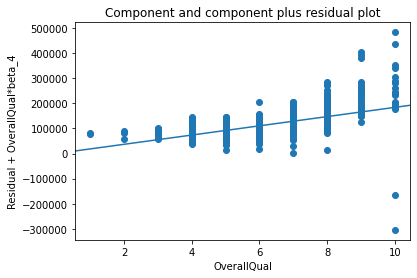

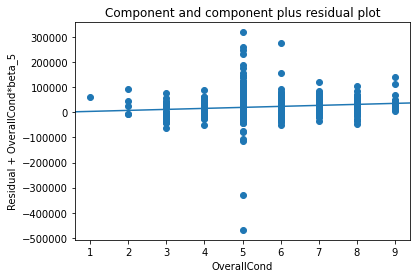

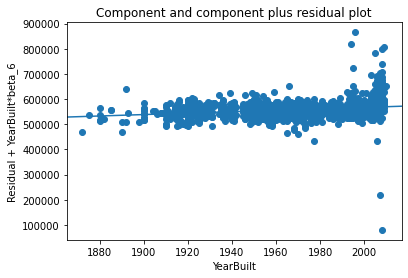

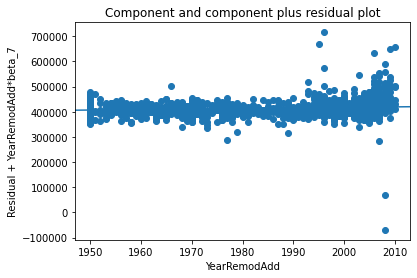

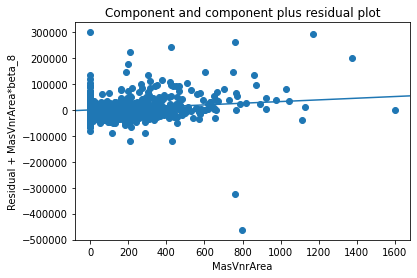

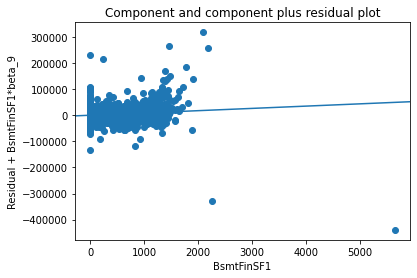

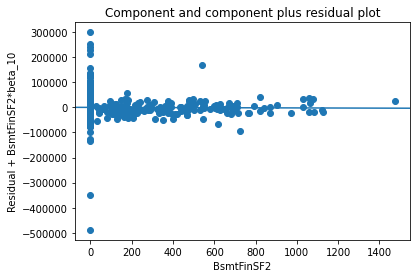

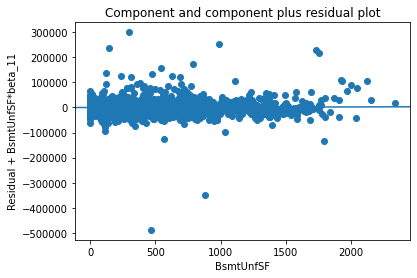

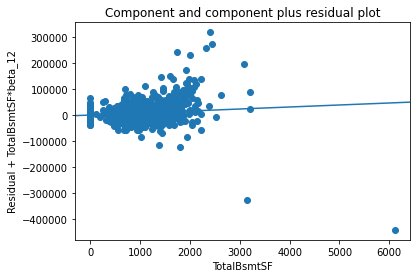

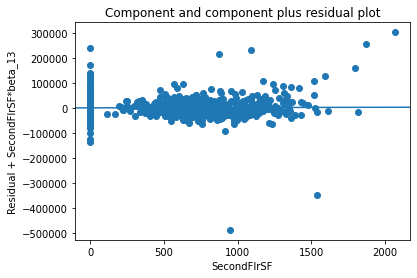

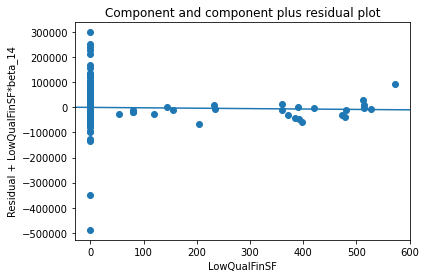

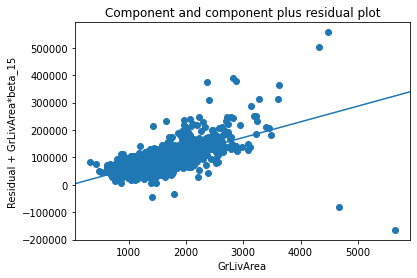

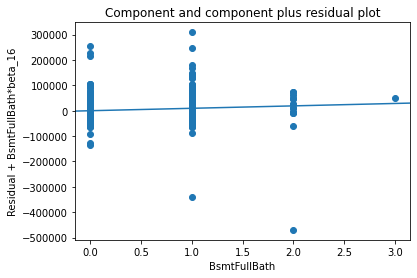

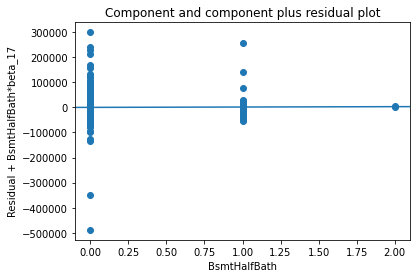

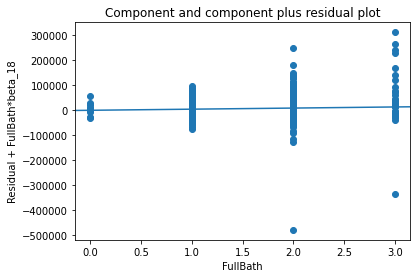

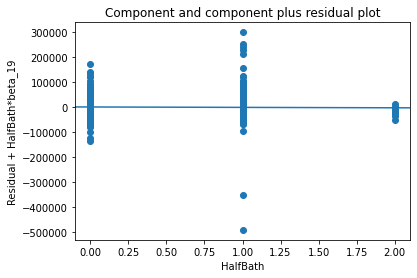

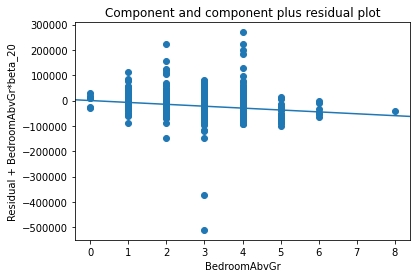

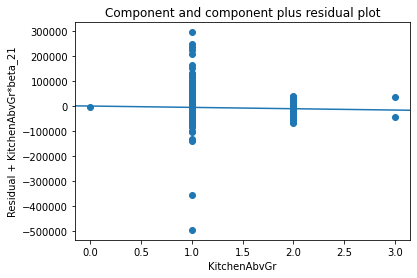

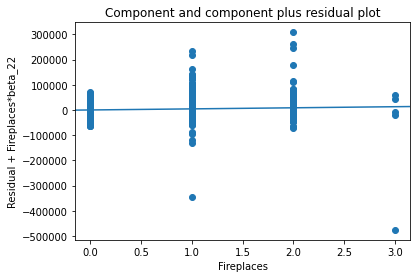

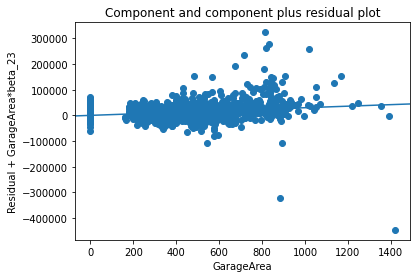

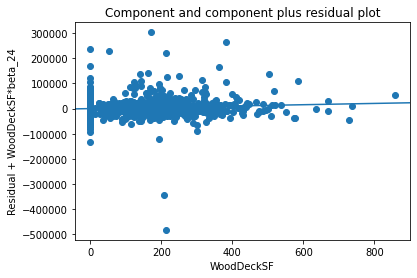

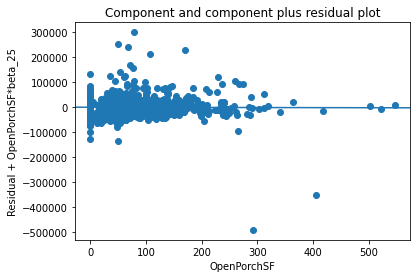

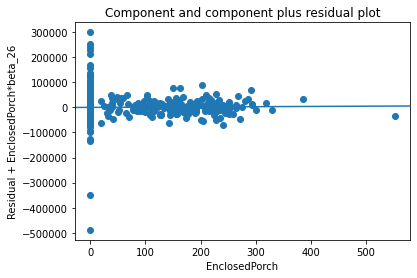

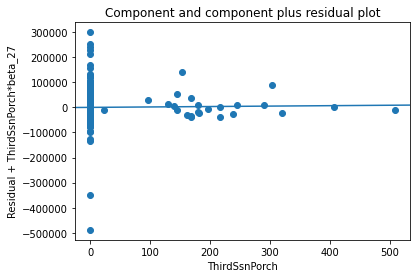

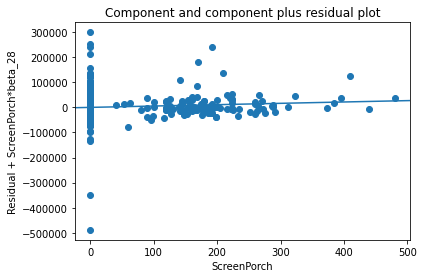

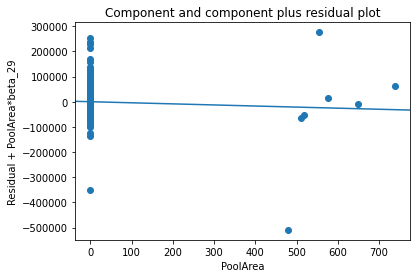

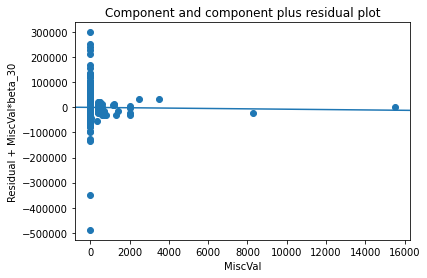

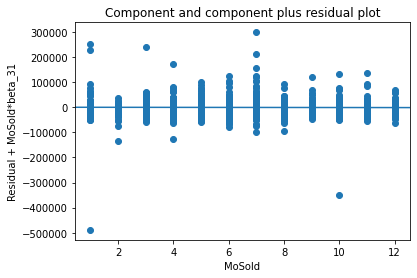

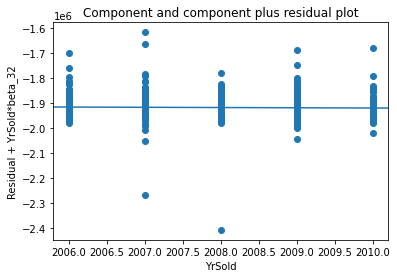

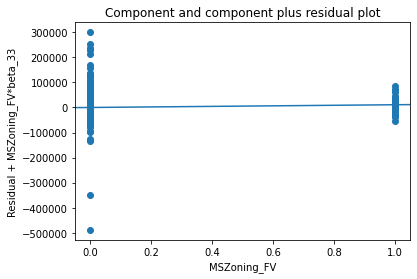

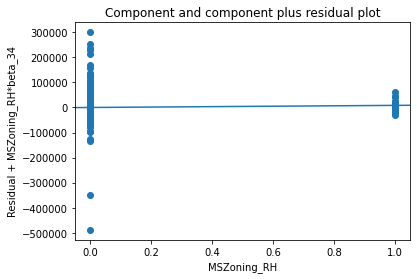

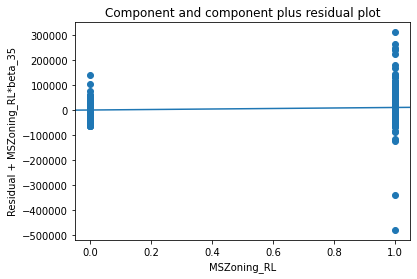

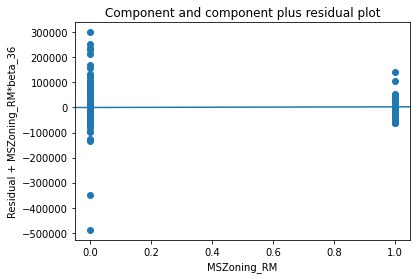

In [ ]:
from statsmodels.graphics.regressionplots import plot_ccpr as ccpr

for i in train.drop(['SalePrice'], axis=1):
    ccpr(result, i)